In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

 

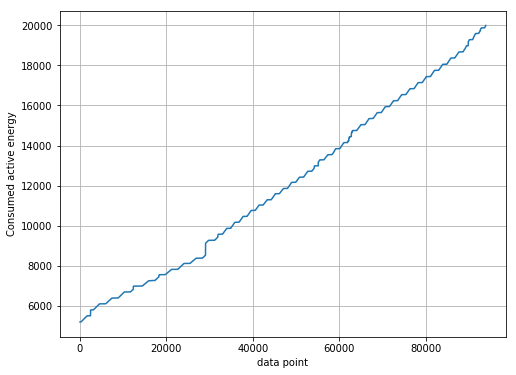

In [4]:
import pandas as pd
data = pd.read_csv('powertest_CRAC3.out.csv',index_col=0)
target = data['Consumed_active_energy_kW']
fig = plt.figure(figsize=(8,6))
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.plot(target.values,label="data")
plt.show()

In [5]:
#perform data cleaning fill missing value
def resample_to_min(series,field_num):
    resample = series.resample('1T')
    minutes_data = resample.mean()
    print(minutes_data)
    minutes_data.plot()
    pyplot.show()
    return minutes_data

def fill_missing_value(df,method):
   #df = df.dropna()
   df.index = DatetimeIndex(df.index)
   df = df.interpolate(method=method, axis=0).ffill().bfill()
   print (df)
   df.plot()
   pyplot.show()
   return df 


In [6]:
import pandas as pd

def time_parser(x):
    return pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')



file_name = 'powertest_CRAC3.out.csv'
series =    pd.read_csv('powertest_CRAC3.out.csv',index_col='Timestamp',parse_dates=True,date_parser=time_parser)
del series['dev_name']
print(series.head())

                     Threephase_Power_Factor  Consumed_apparent_energy_VAh  \
Timestamp                                                                    
2018-05-16 14:41:16                     1.00                         756.0   
2018-05-16 14:41:46                     1.00                         757.0   
2018-05-16 14:42:16                     1.00                         759.0   
2018-05-16 14:42:46                     1.00                         760.0   
2018-05-16 14:43:16                     0.66                         762.0   

                     L2_Current  L1_Active_Power  \
Timestamp                                          
2018-05-16 14:41:16         0.0             0.16   
2018-05-16 14:41:46         0.0             0.16   
2018-05-16 14:42:16         0.0             0.16   
2018-05-16 14:42:46         0.0             0.16   
2018-05-16 14:43:16         0.0             0.16   

                     Consumed_capacitive_reactive_energy_kvarhC  \
Timestamp            

In [7]:
series =    pd.read_csv('powertest_CRAC3.out.csv',index_col='Timestamp',parse_dates=True,date_parser=time_parser)

del series['dev_name']
 
cols = ['Consumed_active_energy_kW','Consumed_apparent_energy_kVAh','Consumed_inductive_reactive_energy_kvarhL','Consumed_capacitive_reactive_energy_kvarhC']

series_new = series.filter(cols,axis=1)
 
series_new = series_new.resample('2min', 'mean').interpolate()
#resampled = pd.resample(tmp, '50min', 'ffill')



print  series_new.head

<bound method DataFrame.head of                      Consumed_active_energy_kW  Consumed_apparent_energy_kVAh  \
Timestamp                                                                       
2018-05-16 14:40:00                5180.000000                    5413.000000   
2018-05-16 14:42:00                5180.000000                    5413.000000   
2018-05-16 14:44:00                5180.000000                    5413.000000   
2018-05-16 14:46:00                5180.000000                    5413.000000   
2018-05-16 14:48:00                5180.000000                    5413.000000   
2018-05-16 14:50:00                5180.000000                    5413.000000   
2018-05-16 14:52:00                5180.000000                    5413.000000   
2018-05-16 14:54:00                5180.000000                    5413.000000   
2018-05-16 14:56:00                5180.000000                    5413.000000   
2018-05-16 14:58:00                5180.000000                    5413.000000

/ext/sage/sage-8.3_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


In [20]:
import pandas as pd

def time_parser(x):
    return pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')


series =    pd.read_csv('powertest_CRAC3.out.csv',index_col='Timestamp',parse_dates=True,date_parser=time_parser)

del series['dev_name']
 
cols = ['Consumed_active_energy_kW','Consumed_apparent_energy_kVAh','Consumed_inductive_reactive_energy_kvarhL','Consumed_capacitive_reactive_energy_kvarhC']

series_new = series.filter(cols,axis=1)

series_new0 = series_new.resample('30S', 'mean').interpolate()

series_new1 = series_new.resample('2min', 'mean').interpolate()
series_new2  = series_new.resample( '50min', 'mean').interpolate()



print  series_new.head
print  series_new0.head
print  series_new1.head

print series_new2.head


/ext/sage/sage-8.3_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/ext/sage/sage-8.3_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:17: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/ext/sage/sage-8.3_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:18: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


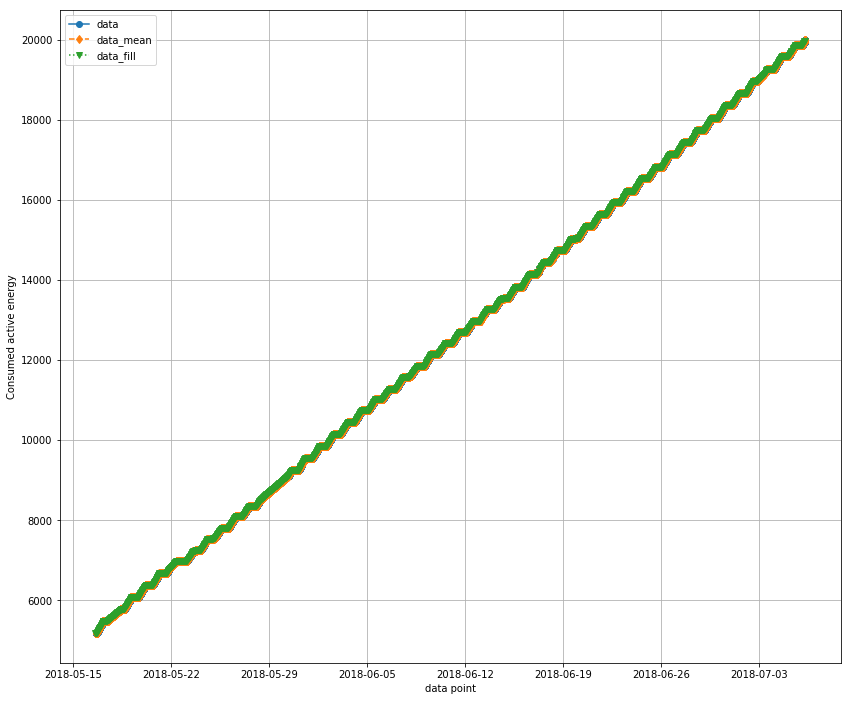

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

target = series['Consumed_active_energy_kW']
x_val = series.index.values
target2 = series_new1['Consumed_active_energy_kW']
x_val2 = series_new1.index.values
target3 = series_new2['Consumed_active_energy_kW']
x_val3 = series_new2.index.values
 
fig = plt.figure(figsize=(14,12))
plt.clf()
plt.cla()
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")

plt.plot(x_val,target.values,label="data",marker='o')
plt.plot(x_val2,target2.values,label="data_mean",ls='--',marker='d')
plt.plot(x_val3,target3.values,label="data_fill",ls=':',marker='v')
plt.legend(loc='upper left')
plt.show()

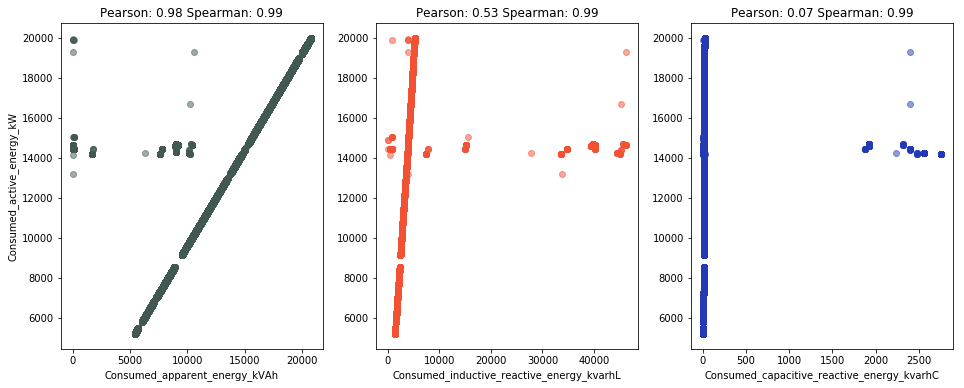

In [22]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

data = series_new
fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['Consumed_apparent_energy_kVAh', 'Consumed_inductive_reactive_energy_kvarhL','Consumed_capacitive_reactive_energy_kvarhC']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Consumed_active_energy_kW')
    i.scatter(data[cols[j]], data['Consumed_active_energy_kW'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%data.corr().loc[cols[j]]['Consumed_active_energy_kW'].round(2)+' Spearman: %s'%data.corr(method='spearman').loc[cols[j]]['Consumed_active_energy_kW'].round(2))
    j+=1

plt.show()

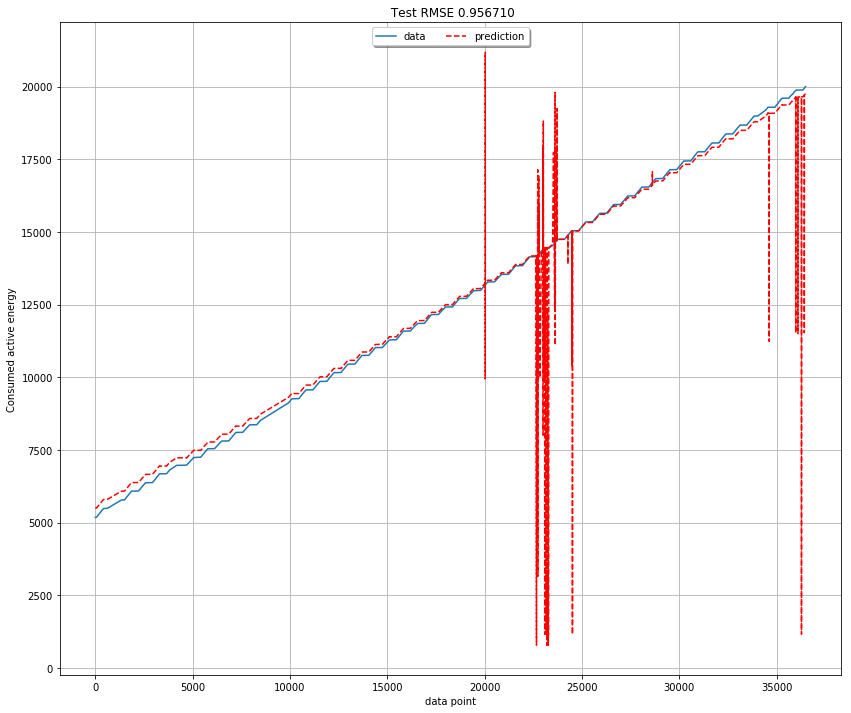

In [26]:
from sklearn import linear_model

 
target = series_new1['Consumed_active_energy_kW']
data2 = series_new1
del data2['Consumed_active_energy_kW']
lm = linear_model.LinearRegression()
model = lm.fit(data2,target)

predictions = lm.predict(data2)


fig = plt.figure(figsize=(14,12))

plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.title(" Test RMSE %f"%(lm.score(data2,target)))
plt.plot(target.values,label="data")
plt.plot(predictions, color='red',linestyle='--',label="prediction")
plt.legend(loc='upper center',  shadow=True, ncol=2)

plt.show()

plt.savefig('predict2.png')